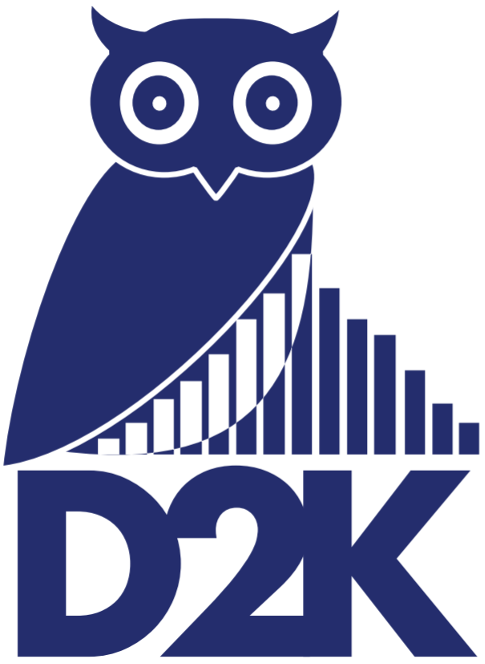 

<center>

# Welcome to DSCI 101 #
### Introduction to Data Science ###

### Code Demo for Week 9 ###

In [ ]:
import numpy as np
import pandas as pd

# Jupyter magic command to displays plots directly in the notebook rather than to a file 
# allow you to view the plots upon executing your code
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['patch.force_edgecolor'] = True

import random
# set random seed for code reproducibility
random.seed(2024)

# `If` Statement #

In [ ]:
# a simple function with if statement
def year_from_semesters(x):
    if x==1 or x==2:
        return 'Freshman'
    elif x==3 or x==4:
        return 'Sophomore'
    elif x==5 or x==6:
        return 'Junior'
    elif x==7 or x==8:
        return 'Senior'
    else:
        return 'Not a valid input'

In [ ]:
### test out the function
year_from_semesters(8)

In [ ]:
# syntax to create a dataframe with only one column
terms = pd.DataFrame({'Semester': np.arange(1, 9)})
terms

[`series.apply(func)`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html) means apply this particular function to each element in the series.

There is also [`df.apply`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)


In [ ]:
### use the above function and apply
### to add a column to the df as Year
terms['Year'] = terms['Semester'].apply(year_from_semesters)
terms

**Practice:** Write a function with if statement to convert numerical grades to letter grades A (>=90), B (80-89), C (70-79), D (60-69) and F (<60). Make sure your function will output 'Not a valid input' if the input is not a number between 0 and 100.

In [ ]:
### fill your code
...

In [ ]:
### test your function
### test all possible cases and end cases!
...

# Random Selection #

Let's simulate flip a coin using the following numpy function:
- [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)

**Practice:** Read the documentation carefully and write code to simulate:
1. flip a fair coin once.
1. flip a fair coin X times and count how many times heads up.

In [ ]:
coin = ['H', 'T']
np.random.choice(coin, size=1)

In [ ]:
### fill your code
...

# `For` Loop

Suppose each experiment is to toss a coin multiple times, and count how many heads appears. We want to repeat this experiment for a large number of time. How to write code to implement this?

### pseudo code of a for loop
### pay attention to the : and indentation

- for loop_var in group_of_loop_vars:
    - do something using loop_var
    - do something without using loop_var
    - save any result if needed
    
- this code is outside of the for loop

In Python, a loop variable can be anything. Simplest case can be just a integer, as you count how many times you have walked the loop. For any containers in Python such as an array, list and dictionary, it is also really easy to loop over each elements in that container. 

In [ ]:
### loop over np.array
my_array = np.array([1,2,3])

for ary in my_array:
    print(ary)

In [ ]:
### loop over a list
my_list = ['this', 'is', 'DSCI', 101]
output = ['Hello']

for item in my_list:
    print(item)
    output.append(item)
    
output

In [ ]:
### loop over a dictionary 
my_dict = {'snake':0, 'person': 2, 'cat': 4, 'beetle':6, 'spider': 8}

for animal, legs in my_dict.items():
    print('A {} has {} legs.'.format(animal, legs))

In [ ]:
# when there is output you need to save from each loop
# easier to start with an empty list
# and append result from each loop
outcomes = []

# do the following a thousand times!
for i in np.arange(1000):
    # each time flip a fair coin 100 times
    toss = np.random.choice(coin, size=100)
    # count how many times heads up
    heads = np.sum(toss == 'H')
    # save number of heads in outcomes
    outcomes.append(heads)

**Questions:**
- If I print out outcomes after the loop, what do you expect to see?
- If I print out i after the loop, what do you expect to see?

In [ ]:
### visualize the results
# outcomes.plot(kind='hist') directly does NOT work
# outcomes is a list, not a Series or DataFrame
# it's easier to call Matplotlib directly than converting outcome into a Series
# use plt.hist(np.array, bins, density=True)
plt.hist(outcomes, bins=30, density=True)
plt.xlabel('number of heads')
plt.ylabel('density')
plt.title('Distribution of number of heads out of 100 coin toss');

**Practice:**
- write a for loop to print out all the divisors given an integer. 
    - for example, if the given interger is 28, then all its divisors are 1, 2, 4, 7, 14 and 28.
    
**Hint:** The operator `%` computes the remainder when dividing by a number.

In [ ]:
### fill your code
integer = ...

# Monte Carlo Simulation

Many situations are just too complicated for simple formula to describe. In these situations we can still get a sense of what is going on by simulating the results. We do this many times using a for loop and gather data on which to base our analysis.

With the basic coding ability such as `If` statement and `For` loop, you are able to carry out interesting real life applications of Monte Carlo Simulation to approximate some complicated probability calculation. Here are some examples: 


## Birthday Problem #

In probability theory, the birthday problem asks for the probability that, in a set of n randomly chosen people, at least two will share a birthday (month and date). 

For example, this class has N students. What do you think is the probablitiy that at least two students have the same birthday? What is your gut feeling about this probablitiy?

We will try to solve this problem in two ways: using math and using computer simulation. 

In [ ]:
# use math to solve 
# this is true probability
import math
n = 40 # change the number of people to explore different prob
p = 1 - (math.factorial(365) / (math.factorial(365-n) * 365**n))
print(p)

Are there same birthdays in this class? **Yes!**

Two pairs shared the same birthday:
- March, 23
- April, 11

**pseudo code**:
1. For n people, randomly sample n days out of a year with replacement, save as Bdays.
2. Check if there are same values (duplicates) in Bdays. If so, keep track of it.
3. Repeat 1 and 2 many many times (a For loop!), keep track of how many times there are duplicated Bdays.

**probability = times of duplicated Bdays / total times of repetition**

In [ ]:
### try out some ideas before start your function! 
...

In [ ]:
### try without the function
...

**Practice:**
Write a function to implement the Birthday Problem. Your function inputs should be how many people we are calculating the probability for, and how many repititions should be done for the Monte Carlo simulation (with a default value of 10000). Your function should return a probability, and print out a whole sentence as the following:

"For a random group of ##, the probabilty of at least 2 people share the same birthday is ###."

In [ ]:
### fill your code here
def birthday_problem_simulation(n, rep=10000):
    ''' a function to perform monte carlo simulation 
    to solve the birthday problem
    input: n number of poeple
           rep number of repetitions for monte carlo simulation'''
    ...

In [ ]:
### test your function
birthday_problem_simulation(n=50, rep=10000)

# Fun Problems to Simulate - explore by yourself#

## Monty Hall Problem #

![alternatvie text](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/2560px-Monty_open_door.svg.png)

The Monty Hall Problem is a staple of all introductory probability classes. Monty Hall was the longtime game show host of The Price is Right. A contestant is faced with three doors. Behind one of the doors is a great prize, say a car. Behing each of the other two doors is a goat. The contestant chooses one of the doors. Monty, who knows where the goats are, opens one of the two unselected doors, showing a goat. Monty then asks the contestant whether they want to switch their answer to the other unselected and unopened door. Sometimes Monty would even offer them cash to change doors. Should the contestant switch? If not, how much should Monty offer before the contestant should switch doors?

This problem became famous as a question from a reader's letter quoted in Marilyn vos Savant's "Ask Marilyn" column in Parade magazine in 1990. Marilyn gave the correct answer but 10,000 readers wrote in to disagree, including 1000 readers with Ph.D.'s. Even the famous mathematician Paul Erdos was unconvinced until he saw the results of a computer simulation. Can you try your own computer simulation?

## Su's favorite probability brain teaser
(I am a big math nerd)

There are 100 people going to take 100 seats in a secret room.
- The people are numbered from 1 to 100, and seats are numbered from 1 to 100. 
- Person No. X is expected to take seat No. X, where X is from 1 to 100.
- They are doing so **in order**, so person No. 1 first, followed by person No. 2 ... with person No. 100 the last one.
- However, the person No. 1 is crazy, and took a seat **randomly**. 
- Now each person No. X where X>1 will sit in the seat No. X (the correct seat) if it is **NOT taken**, otherwise, No. X becomes crazy as well, meaning that he/she will take a seat **randomly** among all empty seats. 
- What is the probability that person No. 100 will sit in seat No. 100?